In [1]:
import os #provide functions to interact with operating system
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
data= pd.read_csv("MagicBricks.csv")
data.shape

(1259, 11)

In [3]:
data.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [5]:
data.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


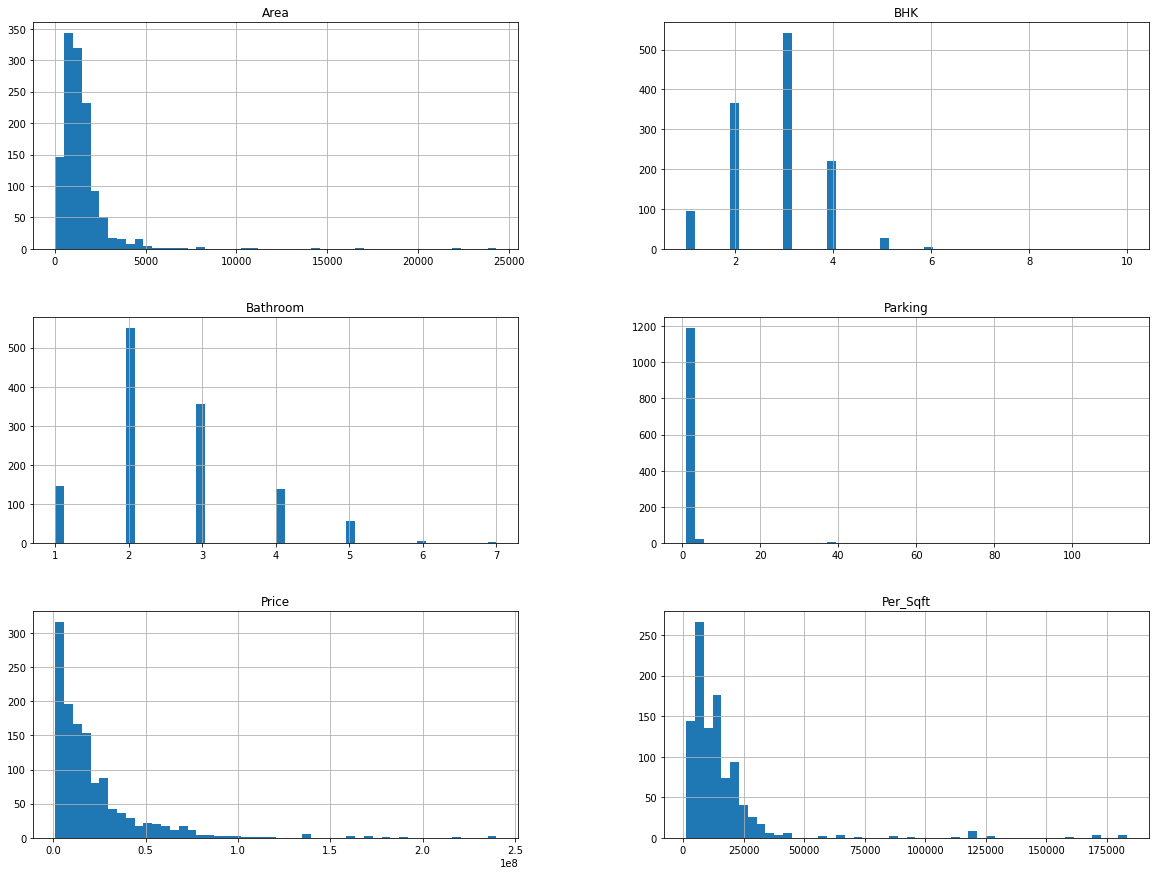

In [6]:
data.hist(bins=50, figsize=(20,15))
plt.show()

###  price of house depends mainly on number of bathrooms, BHK, locality and area

# Cleaning data

In [7]:
data.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [8]:
data=data.dropna()
data.isnull().sum().values.sum()

0

In [9]:
data=data.drop(["Furnishing","Status","Transaction","Locality"], axis=1)
data.head()

,Area,BHK,Bathroom,Parking,Price,Type,Per_Sqft
1,750.0,2,2.0,1.0,5000000,Apartment,6667.0
2,950.0,2,2.0,1.0,15500000,Apartment,6667.0
3,600.0,2,2.0,1.0,4200000,Builder_Floor,6667.0
4,650.0,2,2.0,1.0,6200000,Builder_Floor,6667.0
5,1300.0,4,3.0,1.0,15500000,Builder_Floor,6667.0


In [10]:
X= data.drop(["Price"], axis=1)
y= data["Price"]
X.head()

,Area,BHK,Bathroom,Parking,Type,Per_Sqft
1,750.0,2,2.0,1.0,Apartment,6667.0
2,950.0,2,2.0,1.0,Apartment,6667.0
3,600.0,2,2.0,1.0,Builder_Floor,6667.0
4,650.0,2,2.0,1.0,Builder_Floor,6667.0
5,1300.0,4,3.0,1.0,Builder_Floor,6667.0


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [12]:
from sklearn.preprocessing import StandardScaler
sc_data = StandardScaler()
X=sc_data.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=0)

# select and train a model

#### Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train, y_train)
pred= reg.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(y_test,pred))
print("rmse for linear regression:", rmse)

#### Decision tree

In [18]:
from sklearn.tree import DecisionTreeRegressor
tree_reg= DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
pred=tree_reg.predict(X_test)

tree_rmse= mean_squared_error(y_test, pred)
tree_rmse=np.sqrt(tree_rmse)
print("rmse for Decision tree:",tree_rmse)

15769981.486083888

#### cross validation

In [21]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,X_train, y_train, scoring="neg_mean_squared_error",cv=10)
tree_rmse_score=np.sqrt(-scores)

In [24]:
def display_scores(scores):
    print("scores:",scores)
    print("mean:",scores.mean())
    print("standard deviation:",scores.std())
    
display_scores(tree_rmse_score)

scores: [19057088.02477226 15004033.93126416 30196118.25872221 19483312.7269162
 20065514.42982047 10811431.24968506 16647979.78178778 14470770.68899004
 15057452.2413322  13227383.8907243 ]
mean: 17402108.522401467
standard deviation: 5090439.699970515


In [26]:
lin_score=cross_val_score(reg,X_train, y_train, scoring="neg_mean_squared_error",cv=10)
lin_score=np.sqrt(-lin_score)
display_scores(lin_score)

scores: [25453246.59232136 23132646.23248148 22807776.27144703 16556280.8168859
 12053149.36080997 13117018.47445856 18803285.76989617  9505561.49758547
 17221460.60063992 11206726.36098297]
mean: 16985715.197750885
standard deviation: 5249478.3379204


#### Random forest 

In [28]:
from sklearn.ensemble import RandomForestRegressor
forest_reg= RandomForestRegressor()
forest_reg.fit(X_train, y_train)
pred=forest_reg.predict(X_test)

forest_rmse= mean_squared_error(y_test, pred)
forest_rmse=np.sqrt(forest_rmse)
forest_rmse

11236746.889943969

In [31]:
forest_rmse_score=cross_val_score(forest_reg,X_train, y_train, scoring="neg_mean_squared_error",cv=10)
forest_rmse_score=np.sqrt(-forest_rmse_score)
display_scores(forest_rmse_score)

scores: [12963258.47892048 15186215.69205212 16732505.85326892 11554335.72126118
 11850893.79111179  8787617.5857623  10216500.71194925  7238467.75388759
 15666240.40486062  8965512.46197757]
mean: 11916154.845505182
standard deviation: 3040540.9278196148
